In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logcsv/log2.csv


In [6]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix

In [7]:
df = pd.read_csv('/kaggle/input/logcsv/log2.csv')


In [8]:
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [9]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [10]:
df['Action']

0        allow
1        allow
2        allow
3        allow
4        allow
         ...  
65527    allow
65528    allow
65529     drop
65530     drop
65531     drop
Name: Action, Length: 65532, dtype: object

In [9]:
y = df.Action.copy()
X= df.drop('Action',axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [34]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize the classifier
cls = RandomForestClassifier(max_depth=2, random_state=0)

# Measure training time
start_time = time.time()
cls.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Measure testing time
start_time = time.time()
predictions = cls.predict(X_test)
testing_time = time.time() - start_time
print(f"Testing Time: {testing_time} seconds")

# Optionally, evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")


Training Time: 3.6882736682891846 seconds
Testing Time: 0.14177250862121582 seconds
Model Accuracy: 0.9987792223646462


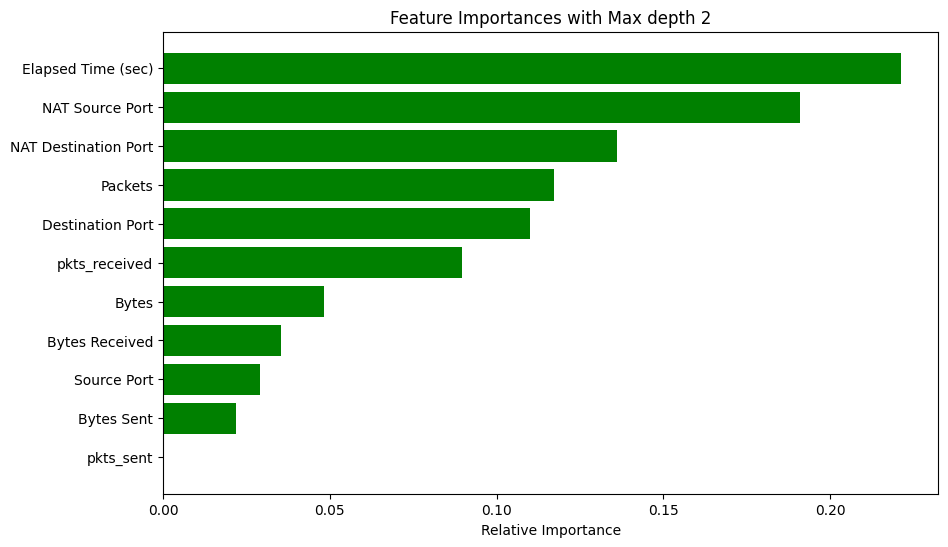

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the feature importances are computed correctly
importances = cls.feature_importances_

# Get the indices that would sort the feature importances
indices = np.argsort(importances)

# Ensure the feature names are correctly extracted from the DataFrame
features = X.columns if isinstance(X, pd.DataFrame) else np.arange(X.shape[1])

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances with Max depth 2')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


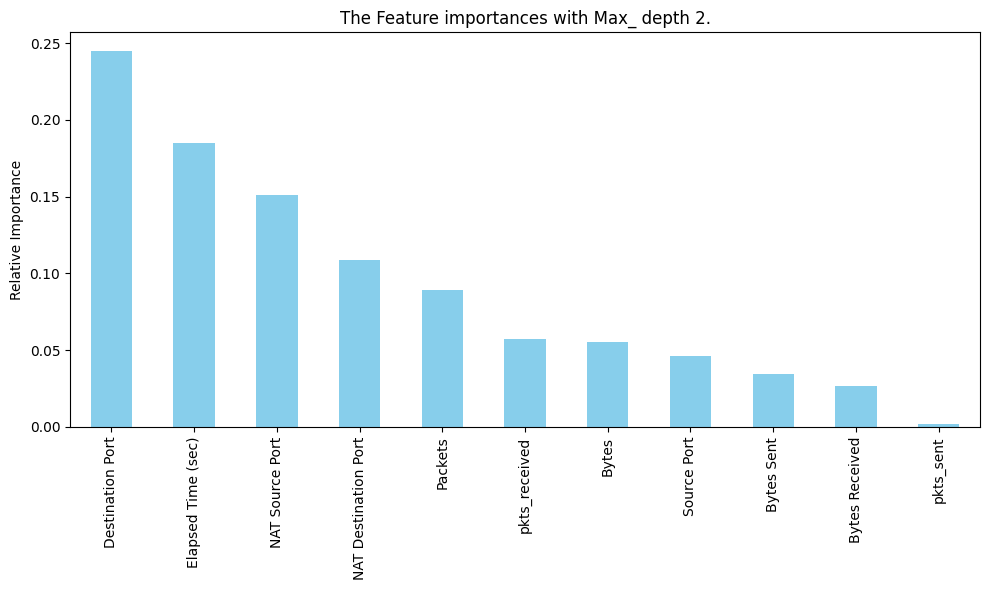

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure feature_names is correctly defined
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Compute importances
importances = cls.feature_importances_

# Compute standard deviation if needed (for RandomForest, we can get std from individual tree importances)
#std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

# Create a pandas Series for importances
forest_importances = pd.Series(importances, index=feature_names)

# Sort the importances in descending order
forest_importances = forest_importances.sort_values(ascending=False)

# Plotting the sorted importances
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std if 'std' in locals() else None, ax=ax, color='skyblue')
ax.set_title("The Feature importances with Max_ depth 2.")
ax.set_ylabel("Relative Importance")
fig.tight_layout()
plt.show()


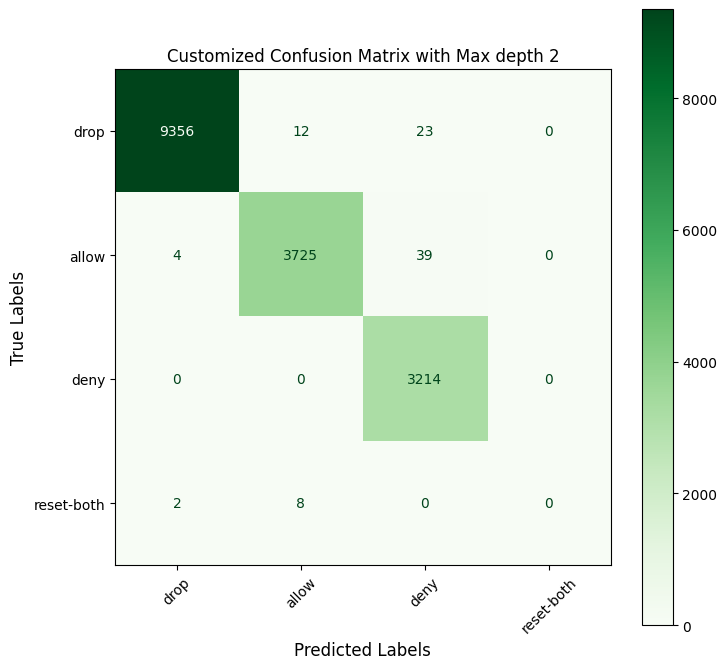

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
class_names = ['drop','allow','deny','reset-both']
# Assuming you have cls (classifier), X_test, and y_test already defined
y_pred = cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Larger figure size
disp.plot(cmap=plt.cm.Greens, ax=ax, colorbar=True )  # Change colormap, remove colorbar

# Further customize with matplotlib
ax.set_title('Customized Confusion Matrix')
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [26]:
y.value_counts()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

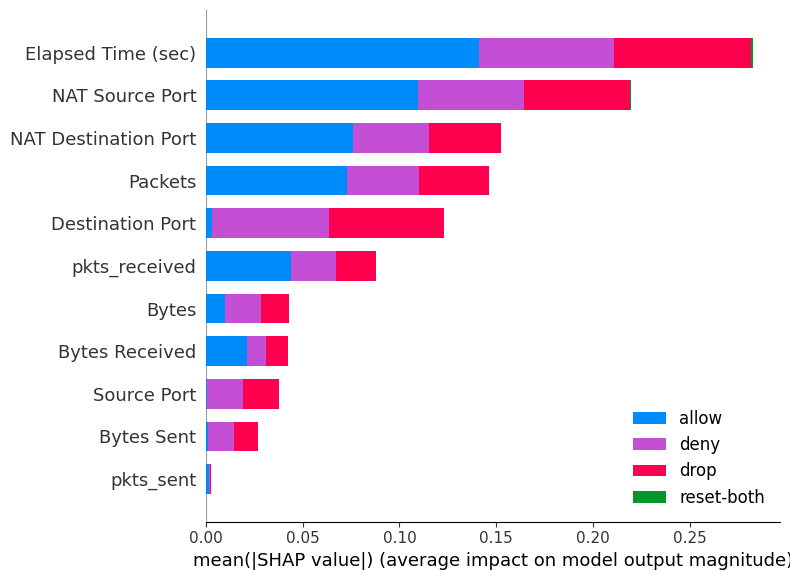

In [20]:

# After training the model, you can compute SHAP values for explanations
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X)

# Ensure you're using `feature_names` from `X_test` if it's a pandas DataFrame
#feature_names = X_test.columns if isinstance(X_test, pd.DataFrame) else None
class_names = ['allow', 'deny', 'drop', 'reset-both']
shap.summary_plot(shap_values, X.values, plot_type='bar', class_names=class_names, feature_names=X.columns,)



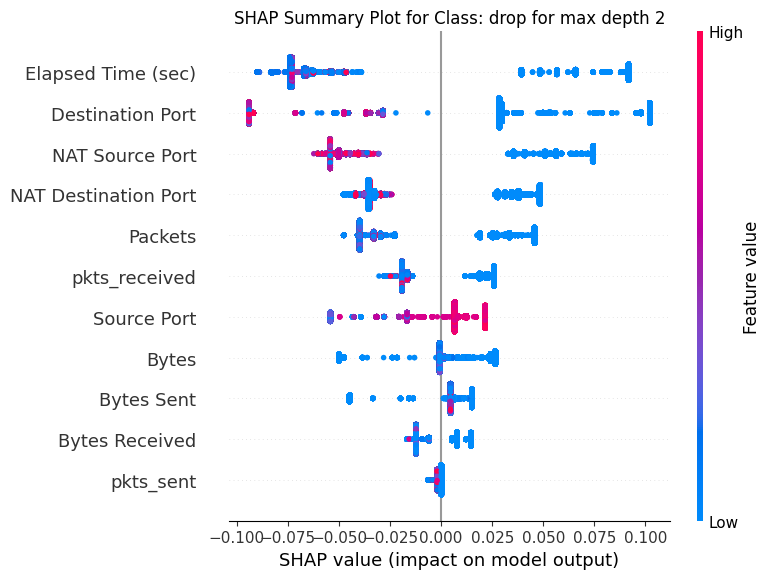

In [55]:
class_names = ['allow', 'deny', 'drop', 'reset-both']
class_index = 2  # Define the class index
plt.title(f"SHAP Summary Plot for Class: {class_names[class_index]} for max depth 2")
shap.summary_plot(shap_values[2], X.values, feature_names = X.columns)

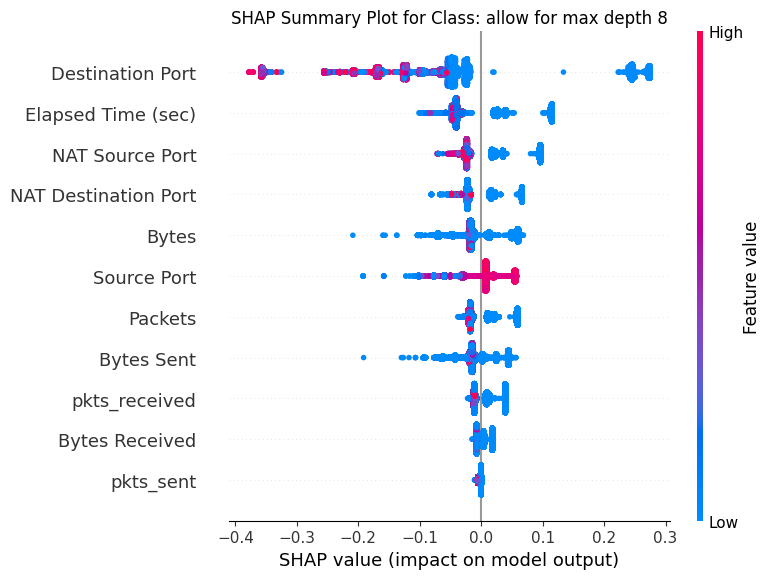

In [66]:
#shap.summary_plot(shap_values[2], X.values, feature_names = X.columns)
import matplotlib.pyplot as plt
class_names = ['allow', 'deny', 'drop', 'reset-both']
class_index = 0  # Define the class index

# Print the class name for index 2
#print(f"Class at index 2: {class_names[class_index]}")
# Assuming shap_values and X are already defined
plt.title(f"SHAP Summary Plot for Class: {class_names[class_index]} for max depth 8")
# Create the SHAP summary plot
shap.summary_plot(shap_values[2], X.values, feature_names=X.columns)

# Add a title to the plot


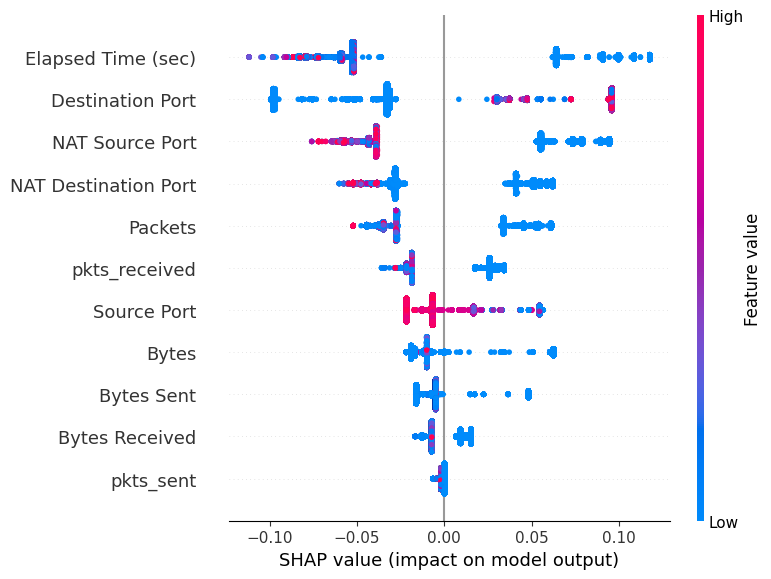

In [189]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

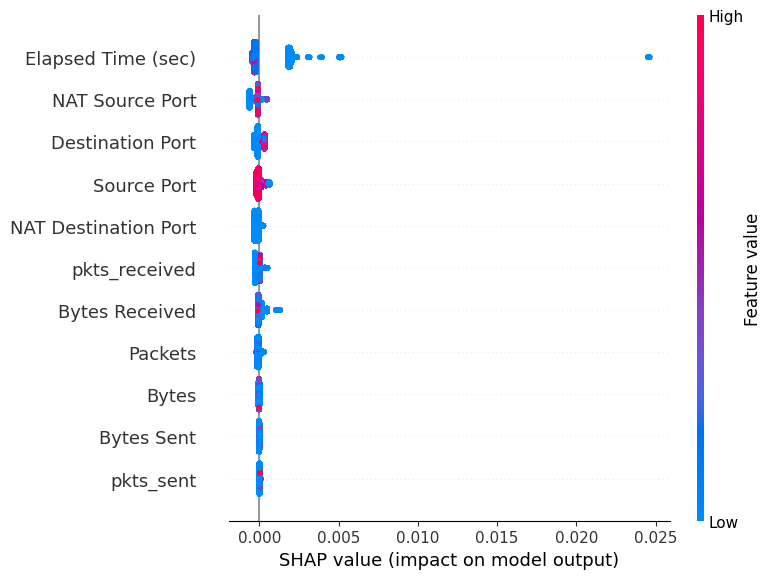

In [257]:
shap.summary_plot(shap_values[3], X.values, feature_names = X.columns)

In [20]:
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Source Port           65532 non-null  int64
 1   Destination Port      65532 non-null  int64
 2   NAT Source Port       65532 non-null  int64
 3   NAT Destination Port  65532 non-null  int64
 4   Bytes                 65532 non-null  int64
 5   Bytes Sent            65532 non-null  int64
 6   Bytes Received        65532 non-null  int64
 7   Packets               65532 non-null  int64
 8   Elapsed Time (sec)    65532 non-null  int64
 9   pkts_sent             65532 non-null  int64
 10  pkts_received         65532 non-null  int64
dtypes: int64(11)
memory usage: 5.5 MB


In [25]:

shap.initjs()
i=8
shap.force_plot(explainer.expected_value[2], shap_values[0][i], X.values[i], feature_names = X.columns)


In [17]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values, X, and class_names are already defined
class_names = ['allow', 'deny', 'drop', 'reset-both']
class_index = 2  # Define the class index

# Display the class name
print(f"SHAP Force Plot for Class: {class_names[class_index]}")

# Select the instance to explain
i = 8

# Generate the SHAP force plot
shap.initjs()
force_plot = shap.force_plot(
    explainer.expected_value[class_index],  # Use the expected value for the specific class
    shap_values[class_index][i],  # Use SHAP values for the specific instance and class
    X.values[i],  # The instance's feature values
    feature_names=X.columns  # Feature names
)

# Display the plot
force_plot


SHAP Force Plot for Class: drop


In [17]:
i = 8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names=X.columns)

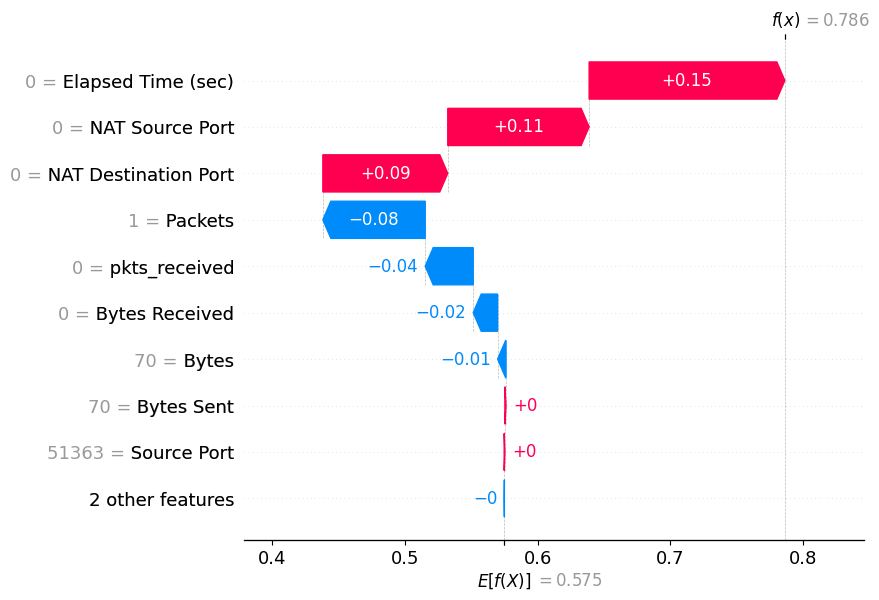

In [216]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

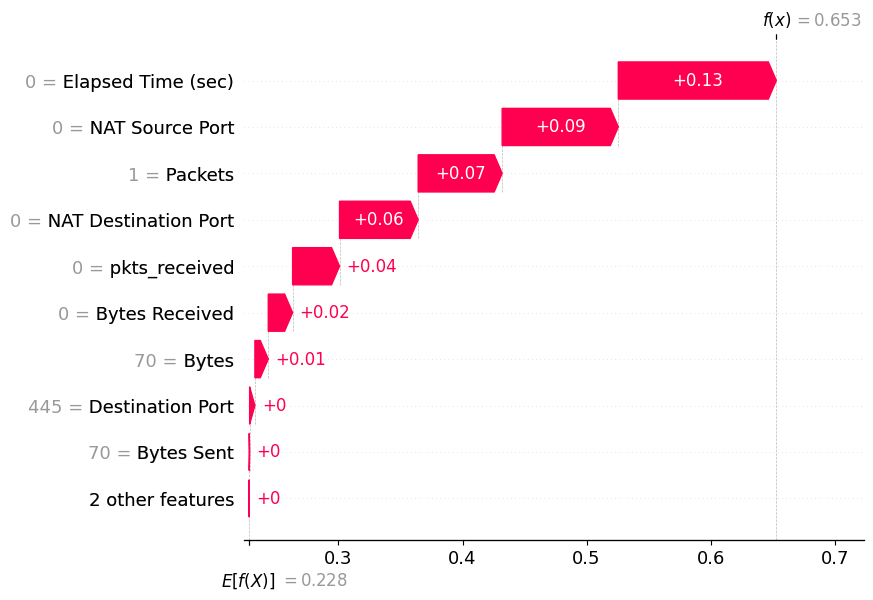

In [217]:
row = 80
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[1], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

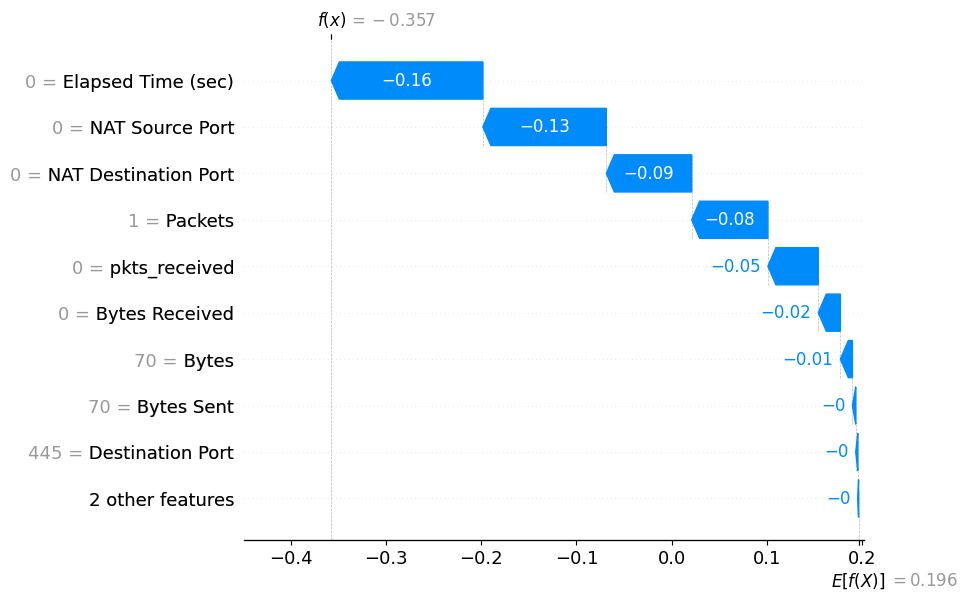

In [218]:
row = 560
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[2], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

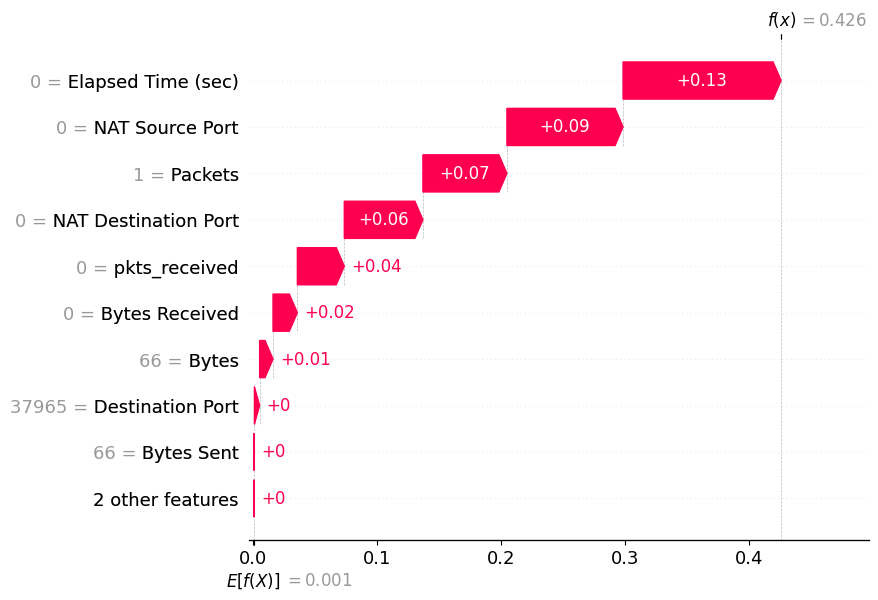

In [219]:
row = 1500
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[3], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [220]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_rows = df.shape[0]
print("Number of rows:", num_rows)


Number of rows: 65532


In [86]:
X = df.drop('Action', axis=1)


In [27]:
 import time
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv('/kaggle/input/logcsv/log2.csv')  # Replace with the path to your actual data
y = df['Action'].copy()
X = df.drop('Action', axis=1)

# Define class names
class_names = ['allow', 'deny', 'drop', 'reset-both']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize and train the classifier
cls = RandomForestClassifier(max_depth=8, random_state=0)
cls.fit(X_train, y_train)

# Calculate accuracy
predictions = cls.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Select the instance and class to explain
instance_index =5600
instance = X_test.iloc[instance_index]
predicted_class_name = cls.predict(X_test.iloc[[instance_index]])[0]
predicted_class_index = class_names.index(predicted_class_name)

# Compute SHAP values for the entire test set
start_time = time.time()
shap_explainer = shap.TreeExplainer(cls)
shap_values = shap_explainer.shap_values(X_test)  # Compute SHAP values for the entire test set
shap_calculation_time = time.time() - start_time
print(f"SHAP Calculation Time for Test Set: {shap_calculation_time} seconds")

# Visualize SHAP values using force_plot for the predicted class
shap.initjs()
force_plot = shap.force_plot(shap_explainer.expected_value[predicted_class_index], shap_values[predicted_class_index][instance_index], instance, feature_names=X.columns)
#print(f"SHAP Force Plot for Class: {predicted_class_name}")
print(f"The predicted class for instance {instance_index} is '{predicted_class_name}'.")
# Display the plot
force_plot


Model Accuracy: 0.9987792223646462
SHAP Calculation Time for Test Set: 19.405938625335693 seconds


The predicted class for instance 5600 is 'allow'.
